<a href="https://colab.research.google.com/github/AngieDuarteA01/Ciencia-de-datos-/blob/main/Ciencia_de_datos_medidas_centrales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install statsmodels

In [2]:
!pip install wquantiles


In [3]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
estado=pd.read_csv("/content/state (1).csv")
estado


,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


In [13]:
estado.head(6)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO


In [14]:
estado.sample(3)

,State,Population,Murder.Rate,Abbreviation
12,Illinois,12830632,5.3,IL
3,Arkansas,2915918,5.6,AR
48,Wisconsin,5686986,2.9,WI


In [15]:
estado.tail(3)

,State,Population,Murder.Rate,Abbreviation
47,West Virginia,1852994,4.0,WV
48,Wisconsin,5686986,2.9,WI
49,Wyoming,563626,2.7,WY


In [17]:
estado.columns

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [18]:
list(estado.columns) #convertir en lista los nombres de las columnas

['State', 'Population', 'Murder.Rate', 'Abbreviation']

In [19]:
estado.info() "si hay datos nulos"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [20]:
estado.describe()
#std desviacion estandar


,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


In [21]:
estado["Population"].mean()

6162876.3

In [22]:
trim_mean(estado["Population"], 0.1)

4783697.125

In [23]:
#Media ponderada de asesinatoas
np.average(estado["Murder.Rate"], weights=estado["Population"])

4.445833981123393

<Axes: >

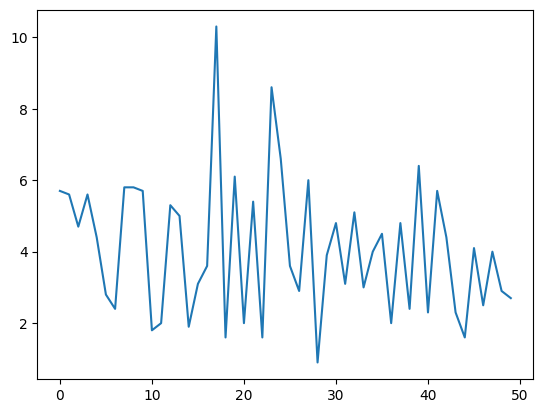

In [24]:
estado["Murder.Rate"].plot.line()

<Axes: >

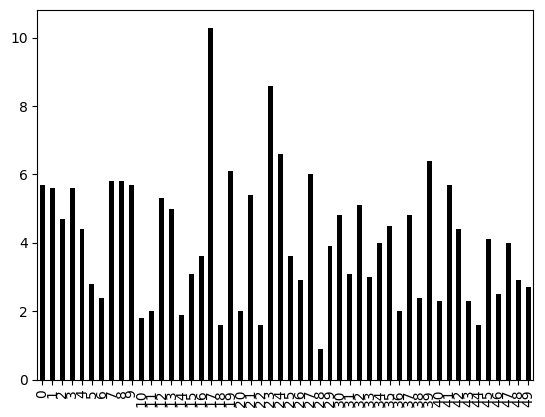

In [28]:
estado["Murder.Rate"].plot.bar(color="black")

Text(0.5, 0, 'Poblacion [millones]')

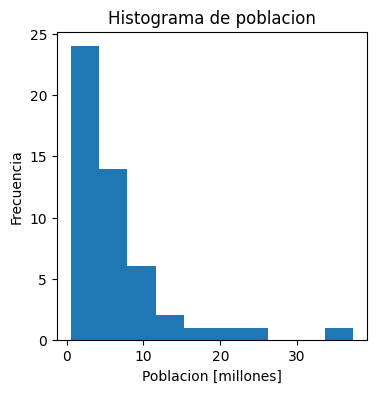

In [32]:
ax=(estado.Population/1_000_000).plot.hist(figsize=(4,4))
ax.set_label("Poblacion [millones]")
ax.set_title("Histograma de poblacion")
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Poblacion [millones]")

Text(0, 0.5, 'Frecuencia')

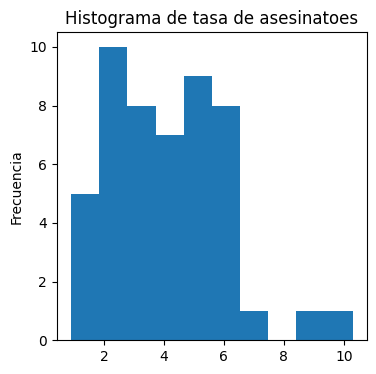

In [33]:
ax=(estado["Murder.Rate"]).plot.hist(figsize=(4,4))
ax.set_label("Tasa de asesinatos")
ax.set_title("Histograma de tasa de asesinatos")
ax.set_ylabel("Frecuencia")

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an 

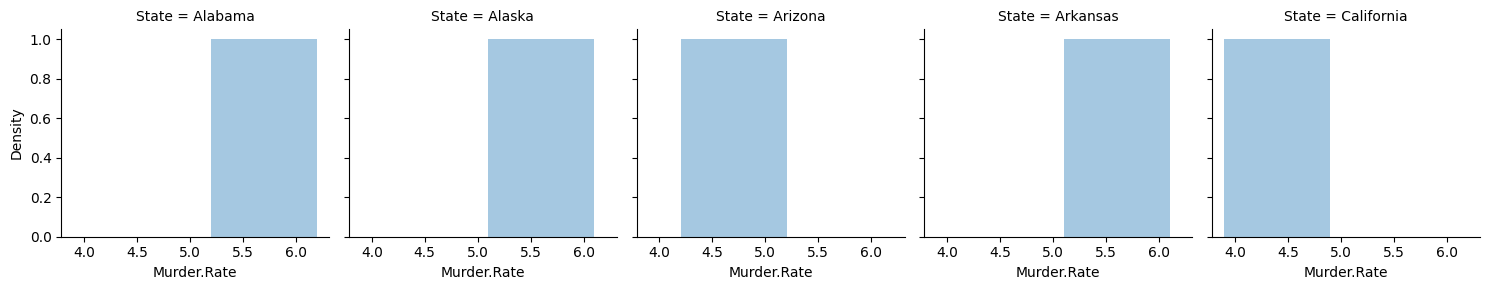

In [35]:
analisis=estado.head()
g=sns.FacetGrid(analisis,col="State")
g.map(sns.distplot,"Murder.Rate")